### Start with Importing needed libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [3]:
#create a dataframe for the CSV file

CS_player_stats = pd.read_csv('/Users/powellshayne/Desktop/githubrepos/VictorVis/data/hltv_player_stats.csv')
CS_player_stats

,country,name,player_url,team,maps,rounds,kd_diff,kd,rating
0,France,ZywOo,https://www.hltv.org/stats/players/11893/zywoo,Vitality,1334,34629,8125,1.39,1.27
1,Ukraine,s1mple,https://www.hltv.org/stats/players/7998/s1mple,Natus Vincere,1727,45750,9669,1.33,1.24
2,Russia,sh1ro,https://www.hltv.org/stats/players/16920/sh1ro,Gambit Youngsters,1187,31021,7312,1.44,1.22
3,Russia,donk,https://www.hltv.org/stats/players/21167/donk,Spirit,466,11556,1967,1.25,1.22
4,Russia,deko,https://www.hltv.org/stats/players/20113/deko,Aurora,927,23640,4739,1.34,1.19
...,...,...,...,...,...,...,...,...,...
963,Russia,PASHANOJ,https://www.hltv.org/stats/players/13779/pashanoj,Unique,620,16227,-2371,0.80,0.83
964,Brazil,bobz,https://www.hltv.org/stats/players/17215/bobz,MIBR Academy,461,12176,-1639,0.81,0.83
965,Ukraine,B1ad3,https://www.hltv.org/stats/players/472/b1ad3,FlipSid3,906,23376,-3476,0.80,0.82
966,Denmark,netrick,https://www.hltv.org/stats/players/8422/netrick,AGF,455,11976,-1736,0.80,0.82


In [4]:
CS_player_stats['team'].value_counts()

team
Natus Vincere        14
Virtus.pro           12
ALTERNATE aTTaX      12
Complexity           11
Ninjas in Pyjamas    11
                     ..
Lucid Dream           1
IHC                   1
Rise Nation           1
PiTER                 1
MIBR Academy          1
Name: count, Length: 284, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [6]:
country_data = CS_player_stats['country']

CS_player_stats['country_encoded'] = le.fit_transform(country_data)
CS_player_stats

,country,name,player_url,team,maps,rounds,kd_diff,kd,rating,country_encoded
0,France,ZywOo,https://www.hltv.org/stats/players/11893/zywoo,Vitality,1334,34629,8125,1.39,1.27,15
1,Ukraine,s1mple,https://www.hltv.org/stats/players/7998/s1mple,Natus Vincere,1727,45750,9669,1.33,1.24,53
2,Russia,sh1ro,https://www.hltv.org/stats/players/16920/sh1ro,Gambit Youngsters,1187,31021,7312,1.44,1.22,42
3,Russia,donk,https://www.hltv.org/stats/players/21167/donk,Spirit,466,11556,1967,1.25,1.22,42
4,Russia,deko,https://www.hltv.org/stats/players/20113/deko,Aurora,927,23640,4739,1.34,1.19,42
...,...,...,...,...,...,...,...,...,...,...
963,Russia,PASHANOJ,https://www.hltv.org/stats/players/13779/pashanoj,Unique,620,16227,-2371,0.80,0.83,42
964,Brazil,bobz,https://www.hltv.org/stats/players/17215/bobz,MIBR Academy,461,12176,-1639,0.81,0.83,6
965,Ukraine,B1ad3,https://www.hltv.org/stats/players/472/b1ad3,FlipSid3,906,23376,-3476,0.80,0.82,53
966,Denmark,netrick,https://www.hltv.org/stats/players/8422/netrick,AGF,455,11976,-1736,0.80,0.82,12


In [7]:
CS_player_stats = CS_player_stats.set_index('name')

In [8]:
CS_player_stats = CS_player_stats.drop(columns=['player_url'])
CS_player_stats

,country,team,maps,rounds,kd_diff,kd,rating,country_encoded
name,,,,,,,,
ZywOo,France,Vitality,1334,34629,8125,1.39,1.27,15
s1mple,Ukraine,Natus Vincere,1727,45750,9669,1.33,1.24,53
sh1ro,Russia,Gambit Youngsters,1187,31021,7312,1.44,1.22,42
donk,Russia,Spirit,466,11556,1967,1.25,1.22,42
deko,Russia,Aurora,927,23640,4739,1.34,1.19,42
...,...,...,...,...,...,...,...,...
PASHANOJ,Russia,Unique,620,16227,-2371,0.80,0.83,42
bobz,Brazil,MIBR Academy,461,12176,-1639,0.81,0.83,6
B1ad3,Ukraine,FlipSid3,906,23376,-3476,0.80,0.82,53


In [9]:
CS_player_stats['team'] = CS_player_stats['team'].str.replace(' ', ', ')
CS_player_stats

,country,team,maps,rounds,kd_diff,kd,rating,country_encoded
name,,,,,,,,
ZywOo,France,Vitality,1334,34629,8125,1.39,1.27,15
s1mple,Ukraine,"Natus, Vincere",1727,45750,9669,1.33,1.24,53
sh1ro,Russia,"Gambit, Youngsters",1187,31021,7312,1.44,1.22,42
donk,Russia,Spirit,466,11556,1967,1.25,1.22,42
deko,Russia,Aurora,927,23640,4739,1.34,1.19,42
...,...,...,...,...,...,...,...,...
PASHANOJ,Russia,Unique,620,16227,-2371,0.80,0.83,42
bobz,Brazil,"MIBR, Academy",461,12176,-1639,0.81,0.83,6
B1ad3,Ukraine,FlipSid3,906,23376,-3476,0.80,0.82,53


In [10]:
team_data = CS_player_stats['team']
CS_player_stats['team_encoded'] = le.fit_transform(team_data)
CS_player_stats

,country,team,maps,rounds,kd_diff,kd,rating,country_encoded,team_encoded
name,,,,,,,,,
ZywOo,France,Vitality,1334,34629,8125,1.39,1.27,15,257
s1mple,Ukraine,"Natus, Vincere",1727,45750,9669,1.33,1.24,53,162
sh1ro,Russia,"Gambit, Youngsters",1187,31021,7312,1.44,1.22,42,105
donk,Russia,Spirit,466,11556,1967,1.25,1.22,42,225
deko,Russia,Aurora,927,23640,4739,1.34,1.19,42,29
...,...,...,...,...,...,...,...,...,...
PASHANOJ,Russia,Unique,620,16227,-2371,0.80,0.83,42,247
bobz,Brazil,"MIBR, Academy",461,12176,-1639,0.81,0.83,6,151
B1ad3,Ukraine,FlipSid3,906,23376,-3476,0.80,0.82,53,94


In [11]:
CS_player_stats['country'].value_counts()

country
Brazil                    105
United States              87
Denmark                    83
Russia                     77
Sweden                     61
Poland                     60
Australia                  41
Ukraine                    37
Germany                    31
Finland                    28
France                     28
China                      28
Bulgaria                   24
Canada                     21
Czech Republic             16
Romania                    15
Kazakhstan                 14
Serbia                     12
Argentina                  12
Norway                     12
United Kingdom             12
Portugal                   11
Spain                      11
Mongolia                   10
Slovakia                   10
Hungary                    10
New Zealand                 9
Turkey                      9
Thailand                    8
Belgium                     8
Belarus                     7
Estonia                     6
Israel                      6
Li

In [12]:
Brazil = ['Brazil']
Brazil_stats = CS_player_stats[CS_player_stats['country'].isin(Brazil)]
Brazil_stats

,country,team,maps,rounds,kd_diff,kd,rating,country_encoded,team_encoded
name,,,,,,,,,
KSCERATO,Brazil,FURIA,1231,31360,4705,1.26,1.14,6,88
saffee,Brazil,MIBR,776,19453,2691,1.23,1.13,6,150
coldzera,Brazil,SK,1810,46558,6053,1.21,1.12,6,210
zevy,Brazil,Fluxo,725,18041,2258,1.20,1.12,6,95
decenty,Brazil,Imperial,564,13601,1527,1.18,1.10,6,124
...,...,...,...,...,...,...,...,...,...
CutzMeretz,Brazil,Meta,497,12416,-782,0.91,0.92,6,155
zmb,Brazil,"Vikings, KR",575,14478,-1076,0.89,0.91,6,255
RICIOLI,Brazil,Case,810,20263,-1588,0.88,0.89,6,50


In [26]:
Brazil_stats = Brazil_stats.drop(columns=['country', 'team', 'country_encoded', 'team_encoded'])
Brazil_stats

,maps,rounds,kd_diff,kd,rating
name,,,,,
KSCERATO,1231,31360,4705,1.26,1.14
saffee,776,19453,2691,1.23,1.13
coldzera,1810,46558,6053,1.21,1.12
zevy,725,18041,2258,1.20,1.12
decenty,564,13601,1527,1.18,1.10
...,...,...,...,...,...
CutzMeretz,497,12416,-782,0.91,0.92
zmb,575,14478,-1076,0.89,0.91
RICIOLI,810,20263,-1588,0.88,0.89


<function matplotlib.pyplot.show(close=None, block=None)>

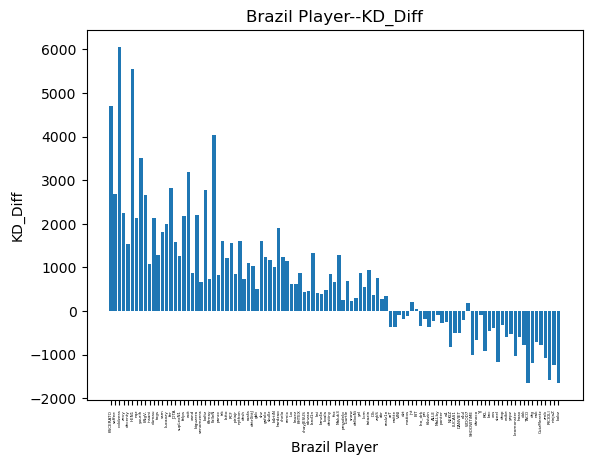

In [27]:
plt.bar(Brazil_stats.index, Brazil_stats['kd_diff'])
plt.xticks(rotation=90, fontsize=3)

plt.title('Brazil Player--KD_Diff')
plt.xlabel('Brazil Player')
plt.ylabel('KD_Diff')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

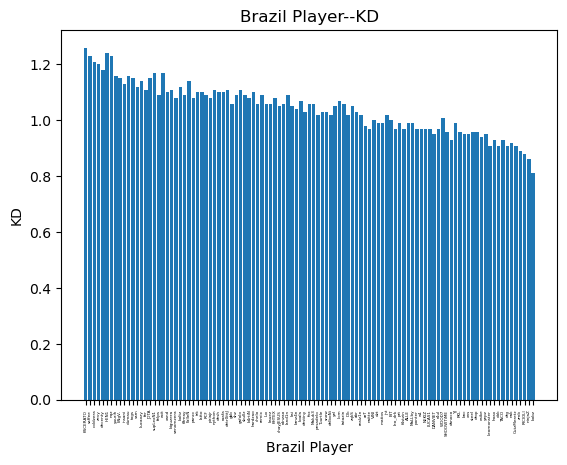

In [31]:
plt.bar(Brazil_stats.index, Brazil_stats['kd'])
plt.xticks(rotation=90, fontsize=3)

plt.title('Brazil Player--KD')
plt.xlabel('Brazil Player')
plt.ylabel('KD')

plt.show

In [13]:
United_States = ['United States']
US_stats = CS_player_stats[CS_player_stats['country'].isin(United_States)]
US_stats

,country,team,maps,rounds,kd_diff,kd,rating,country_encoded,team_encoded
name,,,,,,,,,
wrath,United States,"New, Identity",525,13568,1239,1.13,1.12,55,164
junior,United States,Nouns,867,21598,3048,1.24,1.12,55,172
oSee,United States,NRG,1468,37441,4185,1.18,1.10,55,161
PwnAlone,United States,"Party, Astronauts",1204,30855,3049,1.16,1.09,55,188
Brehze,United States,NRG,1440,36673,3084,1.13,1.09,55,161
...,...,...,...,...,...,...,...,...,...
SileNt,United States,"Swole, Patrol",624,16235,-788,0.93,0.94,55,231
Shakezullah,United States,Triumph,862,22424,-464,0.97,0.94,55,244
ben1337,United States,"Party, Astronauts",1293,32934,-2728,0.88,0.89,55,188


In [15]:
US_stats = US_stats.drop(columns=['country', 'team', 'country_encoded', 'team_encoded'])
US_stats

,maps,rounds,kd_diff,kd,rating
name,,,,,
wrath,525,13568,1239,1.13,1.12
junior,867,21598,3048,1.24,1.12
oSee,1468,37441,4185,1.18,1.10
PwnAlone,1204,30855,3049,1.16,1.09
Brehze,1440,36673,3084,1.13,1.09
...,...,...,...,...,...
SileNt,624,16235,-788,0.93,0.94
Shakezullah,862,22424,-464,0.97,0.94
ben1337,1293,32934,-2728,0.88,0.89


<function matplotlib.pyplot.show(close=None, block=None)>

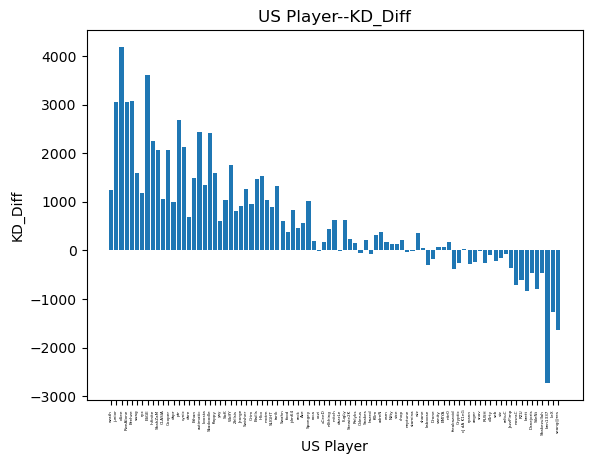

In [25]:
plt.bar(US_stats.index, US_stats['kd_diff'])
plt.xticks(rotation=90, fontsize=3)

plt.title('US Player--KD_Diff')
plt.xlabel('US Player')
plt.ylabel('KD_Diff')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

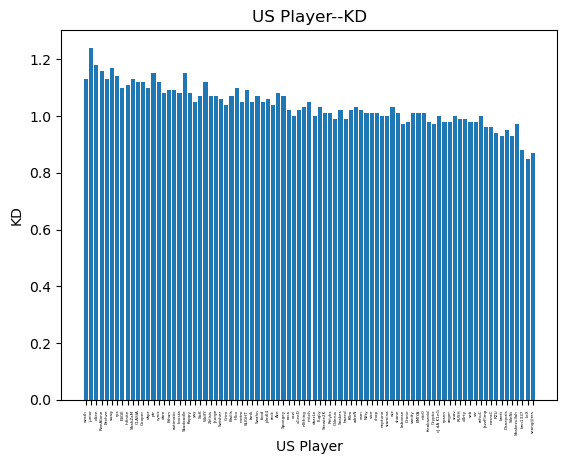

In [32]:
plt.bar(US_stats.index, US_stats['kd'])
plt.xticks(rotation=90, fontsize=3)

plt.title('US Player--KD')
plt.xlabel('US Player')
plt.ylabel('KD')

plt.show

In [28]:
Denmark = ['Denmark']
Denmark_stats = CS_player_stats[CS_player_stats['country'].isin(Denmark)]
Denmark_stats

,country,team,maps,rounds,kd_diff,kd,rating,country_encoded,team_encoded
name,,,,,,,,,
device,Denmark,Astralis,2076,53670,8286,1.25,1.16,12,26
blameF,Denmark,Complexity,1243,32689,5240,1.27,1.16,12,54
mertz,Denmark,"North, Academy",990,26255,2655,1.16,1.10,12,171
JUGi,Denmark,HEROIC,940,24427,2676,1.18,1.09,12,114
nicoodoz,Denmark,"Copenhagen, Flames",1195,30936,3013,1.16,1.08,12,55
...,...,...,...,...,...,...,...,...,...
BERRY,Denmark,Ambush,826,21660,-2564,0.84,0.87,12,23
birdfromsky,Denmark,"Lyngby, Vikings",1161,31439,-3276,0.85,0.86,12,145
HooXi,Denmark,"Copenhagen, Flames",1075,28027,-3361,0.83,0.85,12,55


In [29]:
Denmark_stats = Denmark_stats.drop(columns=['country', 'team', 'country_encoded', 'team_encoded'])
Denmark_stats

,maps,rounds,kd_diff,kd,rating
name,,,,,
device,2076,53670,8286,1.25,1.16
blameF,1243,32689,5240,1.27,1.16
mertz,990,26255,2655,1.16,1.10
JUGi,940,24427,2676,1.18,1.09
nicoodoz,1195,30936,3013,1.16,1.08
...,...,...,...,...,...
BERRY,826,21660,-2564,0.84,0.87
birdfromsky,1161,31439,-3276,0.85,0.86
HooXi,1075,28027,-3361,0.83,0.85


<function matplotlib.pyplot.show(close=None, block=None)>

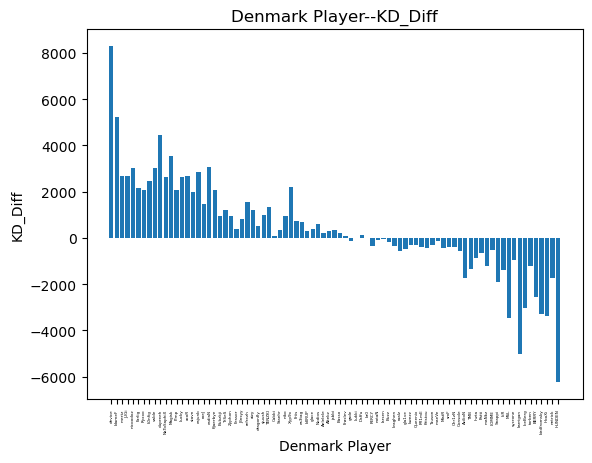

In [30]:
plt.bar(Denmark_stats.index, Denmark_stats['kd_diff'])
plt.xticks(rotation=90, fontsize=3)

plt.title('Denmark Player--KD_Diff')
plt.xlabel('Denmark Player')
plt.ylabel('KD_Diff')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

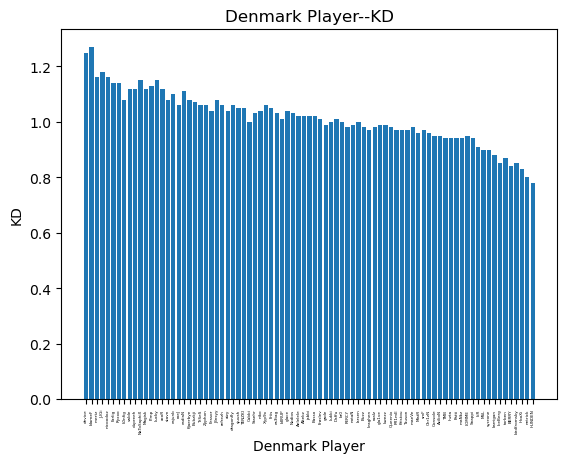

In [36]:
plt.bar(Denmark_stats.index, Denmark_stats['kd'])
plt.xticks(rotation=90, fontsize=3)

plt.title('Denmark Player--KD')
plt.xlabel('Denmark Player')
plt.ylabel('KD')

plt.show